# Практическая работа №1: Исследование алгоритмов формирования аддитивных цепочек

Выполнил студент гр. 0303 Давыдов Михаил, вариант 7.

## Цель работы

Формирование представления о аддитивных цепочках, выработать умение составлять и применять алгоритмы для нахождения минимальных аддитивных цепочек для заданного числа, привить навык использования систем компьютерной математики для реализации алгоритмов.

## Основные теоретические положения
**Алгоритмы нахождения степени n для числа x:**

I) Бинарный "SX" метод
1) Записать число n в бинарном виде
\\[
  n = (a_{m}a_{m-1}...a_{1}), a_{m} = 1
\\]
2) Отбросить старший бит
3) Совершить замены по принципу: 1->"SX", 0->"S"
4) Далее S - возведение в квадрат, а X - умножение на x
II)Метод множителей (Рекурсивный алгоритм возведения в степпень)
1) Если n - составное, необходимо разложить его на n = pq, где p - простое число. Заменить n на p.
2) Возведем таким же образом x в (n-1) степень и умножить на x. 
3) При n = 1 вернуть текущее x
III) m-арный метод
1) Представить n в системе счисления m:
\\[n = \sum_{j=0}^{t}d_{j}m^{t-j}, при 0 \leq d_{j} < m \\]
2) Сделать возведение:
\\[x, x^{2}, ..., x^{m-1}\\]
3) Пока не получим возведение в n находим:
\\[y_t=x^{d_{0}m^{t}+d_{1}m^{t-1}+...+d_t}=x^{n}\\] 
**Дерево степеней**

Дерево степень дает минимальное количество умножений для n(не для всех, а для относительно малых).
Построение дерева (рекурсивно):
0) При уже построенном k-ом уровне дерева необходимо построить следующий.
1) Берется каждый узел (назовем его N) на k-ом уровне, причем важно, по порядку слева направо и прибавляем к нему узлы из ранних уровней, но в том же поддереве:
\\[N + n_{0}, N + n{1}, ... , 2N\\]
2) Если полученное значение уже было добавлено в качестве узла, то оно пропускается
Пример дерева степеней:
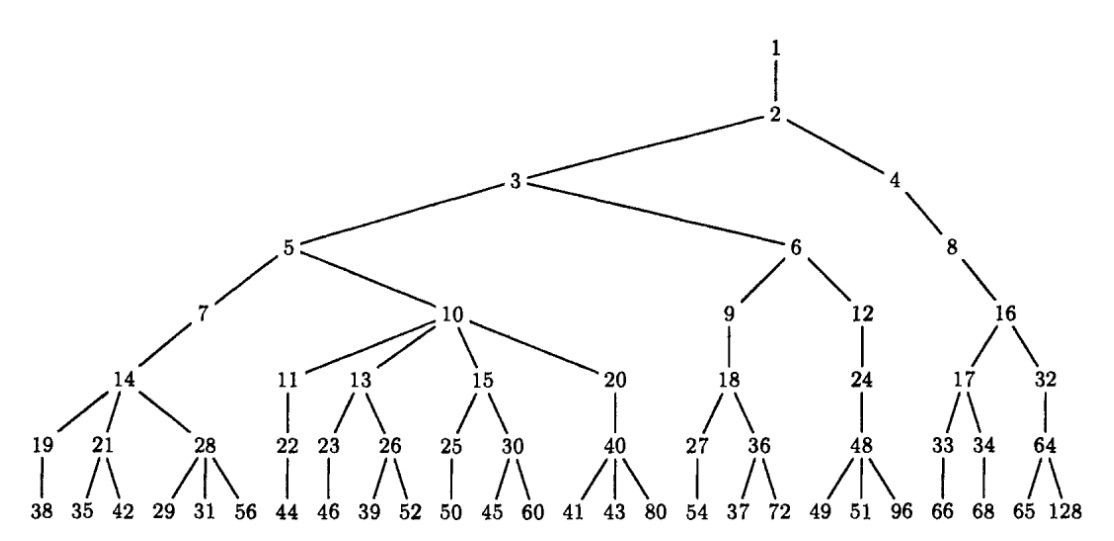
**Аддитивные цепочки**

Аддитивная цепочка для натурального N - это последовательность натуральных чисел от 1 до N, где каждый элемент последовательности равен сумме двух предыдущихЖ
\\[a_{k} = a_{j} + a_{i}, где k > i и k > j\\]
Свойства:
1) Все аддитивные цепочки возрастающие
2) Для вышеописанной формулы пара (j, i) - является шагом
3) Если полученные в ходе шагов числа одинаковые, то второе можно опустить
3) Если существкет более одной подходящей пары (j, i), то полагаем, что j - наибольшее.
(Теорема) Если аддитивная цепочка включает d удвоений и f = r-d неудвоений, то:
\\[n \leq 2^{d-1}F_{f+3}, F_{i} - число Фибоначчи\\]
(Следствие) Если аддитивная цепочка ключает f неудовений и s малых шагов, то:
\\[s \leq f \leq \cfrac {s}{1-lb(\phi)}\\]
Виды шагов:
1) Удвоение: 
\\[j=i=k-1\\]
2) Звездный шаг: \\[j = k-1 (берется последнее найденное число)\\]
3) Малый шаг: 
\\[\lambda(a_{k}) = \lambda(a_{k-1})\\]
**Прибриженные алгоритмы для нахождения аддитивных цепочек**

I) Алгоритм Брауэра
Позволяет вычислить n-ую степень за:
\\[l_{B}(n) = \lambda(n) + \cfrac{\lambda(n)}{\lambda(\lambda(n))}+O(\cfrac{\lambda(n)\lambda(\lambda(\lambda(n)))}{(\lambda(\lambda(n)))^{2}}) \\]
Алгоритм:
Для натурального числа $n$ при заданном начальном числе $k$ можно построить цепочку Брауэра с помощью рекурсивной формулы:
$\begin{equation*}
 B_k(n) = 
     \begin{cases}
       1,2,3,...,2^k - 1 &\text{if $n < 2^k$}\\
           B_k(q),2*q,4*q,8*q,...,2^k*q,n &\text{if $n >= 2^k,  q = [\frac{n}{2^k}]$}
     \end{cases}
    \end{equation*}$  
1) Задаётся фиксированный параметр $k$ для рассматриваемого числа $n$. Вычисляются "вспомогательные числа":
$d = 2^k, q_1 = [\frac{n}{d}], r_1 = n \; mod \; d => n = q_1*d + r_1$  
$q_2 = [\frac{q1}{d}],r_2 = q_1 \; mod \; d => q_1 = q_2*d + r_2$  
2) Процедура продолжается до тех пор, пока не появится такое $q_s <  d => q_{s-1} = q_s*d + r_s$  
3) Таким образом $n$ имеет вид:
    \\[n = d^s*q_s + d^{s-1}*r_s + d^{s-2}*r_{s-1} + ... + \; r_1 \\]  
II)Алгоритм Яо - метод нахождения аддитивной цепочки для натурального числа $n$.
    Алгоритм:
    Задаём некоторое целое $k >= 2$ и число $n$ раскладывается в $2^k$-й системе счисления:
    \\[ n = \sum\limits_{i=0}^j a_i*2^{i*k} \; a_j \neq 0 \\]
    Введём функцию d: 
    \\[d(z) = \sum_{i:a_i = z} 2^{i*k}\\]  
    1) Базовая последовательность:
    \\[1,2,4,8,...,2^{\lambda(n)}, \; где \; \lambda(n) - уменьшенная \; на \; единицу \; длина \; бинарной \; записи \; числа \; n \\]  
    2) Вычисление $d(z)$ для всех $z \in \{1,2,3,...,2^k-1\}, \; d(z) \neq 0$  
    3) Вычисление $z*d(z)$ для всех $z$  
    4) В конечном итоге, $n$ представляет собой разложение вида:
    \\[ n = \sum\limits_{z = 1}^{2^{k-1}} z*d(z) \\]  
III)Алгоритм дробления вектора индексов - метод нахождения минимальной звёздной цепочки для натурального числа $n$.  
Алгоритм:  
1) Задаётся начальный вектор $r = \{1,2,3,...,m \}$ по которому строится начальная цепочка $a = \{a_1 = 1,a_2,a_3,...,a_{m+1}\}$  
2) Если $a_{m+1} = n$, то алгоритм завершается. В противном случае вектор r делится на две части: изменяемую и неизменяемую.  
3) Находим $a_{min}$ и $a_{max}$. Если $n \in [a_{min},a_{max}]$, то изменяемая часть вектора уменьшается на единицу по самому старшей позиции.  
4) Если цепочка так и не была найдена по всем возможным переборам изменяемой части вектора вплоть до $p = {1,1,...,1}$, то изменяемая часть принимает первоначальное значение, а неизменяемая уменьшается на единицу и процесс повторяется снова.  
5) Если были перебраны все варианты обоих частей вектора, то вектор $r$ увеличивается на единицу и принимает значение $r = {1,2,...,m+1}$.  
6) Алгоритм продолжается, пока не будет найдена цепочка.

## Постановка задачи

Реализовать точные и приближённые алгоритмы нахождения минимальных аддитивных цепочек с использованием системы компьютерной математики SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы
1)Были выполнены вычисления для $x^n$ бинарным методом (SX) и методом множителей для n = 47, 80:
Двоичный метод "SX":

Для 47:
    \\[ 47 = 101111_2 \\]
    \\[ 01111_2 = SXSXSXSSX \\]
    \\[ SSXSXSXSX = x^2,x^4,x^5,x^{10},x^{11},x^{22},x^{23},x^{46}, x^{47} \\] 
Для 80:
    \\[ 80 = 1010000_2 \\]
    \\[ 010000_2 = SXSXSXSXSX \\]
    \\[ SSXSSSS = x^2,x^4,x^5,x^{10},x^{20},x^{40},x^{80}\\]  
    Метод множителей,
    для 47:
    \\[ 47 = p*q+1 = 2*23 + 1\\]
    \\[23 = 2*11 + 1\\]
    \\[11 = 2*5 + 1\\]
    \\[5 = 2*2 + 1\\]
    \\[x^{47} = ((((x^2)x)^2x)^2)x\\]  
    Для 80:
    \\[y^{80} = x^2y^{40}=(((y^2)^2)^2)*((((y^2)^2)^2)^2)^2\\]   
    Количество операций представлено в табл. 1
    
    
    
\\[ Таблица \; 1 - количество \; операций \; для \; бинарного \; метода \; и \; метода \; множителей \\]

|  n  | Бинарный метод | Метод множителей |
|:---:|:--------------:|:----------------:|
|  47 |        9       |         9        |
|  80 |        9       |        13        |

Исходя из таблицы можно сделат вывод, что метод множителей работает не за меньшее количество операций, чем бинарный метод. В некоторых случаях за гораздо большее, когда наименьший простой множитель для n будет равен 2.

2) Реализуем алгоритм Брауэра

In [ ]:
def _lambda(n):
    n = Integer(n)
    return n.nbits() - 1

def min_chain_len(n):
    return int(_lambda(n) + _lambda(n) / _lambda(_lambda(n)) + (_lambda(n) * _lambda(_lambda(_lambda(n)))) / (_lambda(_lambda(n)) ** 2))


def to_str(chain):
    return " ".join(map(str, chain[:min(len(chain), 17)])) + (" ..." if len(chain) > 17 else "")

def brauer(n, k):
    n = Integer(n)
    d = 2 ** k
    rarr = [] 
    q = n.quo_rem(d)[0]
    rarr.append(n.quo_rem(d)[1])
    sqmax = rarr[0] 
    i = 0
    while q >= d:
        rarr.append(q.quo_rem(d)[1])
        q = q.quo_rem(d)[0]
        if rarr[i] > sqmax:
            sqmax = rarr[i]
        i += 1
    rarr.append(q)
    sqmax = max(q, sqmax)
    chain = Sequence([0]*(sqmax + (len(rarr) - 1) * (k + 1)), ZZ) # addition chain
    for i in range(1, sqmax + 1):
        chain[i-1] = i
    chain[sqmax - 1] = q
    for i in range(0, len(rarr) - 1):
        for j in range(0, k):
            chain[sqmax + i * (k + 1) + j] = chain[sqmax + i * (k + 1) + j - 1] * 2
        chain[sqmax + i * (k + 1) + k] = chain[sqmax + i * (k + 1) + k - 1] + rarr[len(rarr) - 2 - i]
    chain[sqmax - 1] = sqmax  
    chain = sorted(set(chain))  
    if chain[0] == 0:
        chain = chain[1:]
    return chain
set_random_seed(352073568)
n_set = Sequence([0]*10, ZZ)

for i in range(0, 5):
    n_set[i] = randint(17, 127)
for i in range(0, 5):
    n_set[i+5] = randint(127, 65535)
    
for k in [1, 2, 3, 6, 9, 16]:
    print("k = ", k, ":")
    for n in n_set:
        chain = brauer(n, k)
        print("   n = {:5};  chain(n) = {:5};  l(n) = {:5}  | {}".format(n, len(chain), min_chain_len(n), to_str(chain)))

Из работы программы можно сделать вывод, что, чтобы алгоритм Брауэра строил цепочки относительно небольшой длины, k необходимо задавать сильно меньше n, а для небольших n лучше брать k = 1 или k = 2.

3)Реализуем алгоритм дробления векторов индексов:

In [ ]:
def findNext(vec, ind = 1):
    count = 0
    for i in range(len(vec) - 1, -1, -1):
        if vec[i] == 1:
            vec[i] = i + ind
            count += 1
        else:
            vec[i] -= 1
            break
    if count == len(vec):
        return False
    return vec

def findNextBigger(vec,ind = 1):
    vec = findNext(vec)
    while vec and vec[-1] != len(vec) + ind - 1:
        vec = findNext(vec)
        
    return vec

def starChain(vec):
    chain = [1]
    for i in range(len(vec)):
        chain.append(chain[i] + chain[vec[i] - 1])
        
    return chain

Также потребуется функция для измерения длин звездных цепочек:

In [ ]:
def _nu(n):
    res = 0
    while n != 0:
        if n % 2 == 1:
            res += 1
        n //= 2
    return res

In [ ]:
def vectorSplit(n, left_, right_):
    static_arr = 1
    changing_arr = 1
    
    for m in range(left_, right_ + 1):
        q = m // 2
        buf_static_arr = [i for i in range(1, q + 1)]
        while buf_static_arr != False:
            buf_changing_arr = [i for i in range(q + 1, m + 1)] 
            a_max = starChain(buf_static_arr + buf_changing_arr)[-1]
            a_min = starChain(buf_static_arr + [1 for _ in range(len(buf_changing_arr))])[-1]
            if a_max < n or a_min > n:
                buf_static_arr = findNext(buf_static_arr)
                static_arr += 1
                continue   
            while buf_changing_arr != False:
                current_n = starChain(buf_static_arr + buf_changing_arr)[-1] 
                if current_n == n:
                    return (static_arr, changing_arr, buf_static_arr + buf_changing_arr)
                elif current_n < n:
                    buf_changing_arr = findNextBigger(buf_changing_arr, q + 1)
                    continue     
                buf_changing_arr = findNext(buf_changing_arr, q + 1)
                changing_arr += 1
            buf_static_arr = findNext(buf_static_arr)
            static_arr += 1
    return (0, 0, [])

def lambd(n):
    res = 0
    while n != 0:
        res += 1
        n //= 2
        
    return res - 1

In [ ]:
from time import time

LIST = [1234, 2345, 1212, 2323, 1265]
for n in LIST:
    left_ = lambd(n)
    right_ = lambd(n) + _nu(n) - 1
    start_time = time()
    result = vectorSplit(n, left_, right_)
    end_time = time()- start_time
    print("n =", n,  
          "\nVector:", result[2], 
          "\nChain:", starChain(result[2]),
          "\nLength:", len(result[2]),
          "\nWorkTime:", end_time, "\n", "-"*100)

|   n  |                            a                            | len |        time        |
|:----:|:-------------------------------------------------------:|-----|:------------------:|
| 1234 |       1, 2, 4, 8, 16, 18, 19, 38, 76, 152, 304, 608, 1216, 1234      |  13 |   9.3963 seconds  |
| 2345 | 1, 2, 4, 8, 16, 32, 40, 72, 144, 288, 576, 1152, 2304, 2344, 2345     |  14 |   48.7039 seconds  |
| 1212 | 1, 2, 4, 8, 12, 24, 48, 96, 192, 384, 768, 1152, 1200, 1212                  |  13 | 11.6785 seconds |
| 2323 | 1, 2, 4, 8, 16, 18, 36, 72, 144, 288, 576, 1152, 2304, 2322, 2323     |  14 |   69.3921 seconds  |
| 1265 | 1, 2, 4, 8, 9, 17, 26, 52, 104, 208, 416, 832, 1248, 1265 |  13 |   22.0389 seconds  |

4)Проверим гипотезу Штольца-Брауэра

In [ ]:
def choose(n):
    lambda_n = lambd(n)
    nu_n = nu(n)
    right_ = lambda_n + nu_n - 1 
    left_ = lambda_n
    
    if nu_n == 2:
        left_ = lambda_n + 1
    elif nu_n >= 3:
        left_ = lambda_n + 2
    
    if lambda_n > 8:
        left_ = lambda_n + 4
        
    return left_, right_

In [ ]:
from time import time

for n in range(1, 13):
    num = (2 ** n) - 1
    
    left_, right_ = choose(num)
    
    start_time = time()
    result = vectorSplit(num, left_, right_)
    end_time = time() - start_time
    
    l_star_two_n = len(result[2])
    
    left_, right_ = choose(n)
    
    l_star_n = len(vectorSplit(n, left_, right_)[2])
    
    print("l*(2^{0} - 1) =".format(n), l_star_two_n, ", time :".format(n), end_time)
    assert(l_star_two_n == l_star_n + n - 1)

| $$l^{*}(2^n-1)$$ | $$l^{*}(n)$$ | $$n$$ | $$l^{*}(2^{n}-1) \leq l^{*}(n) + n - 1$$ |
|:----------------:|:------------:|:-----:|:----------------------------------------:|
|         1        |       1      |   1   |                   Верна                   |
|         3        |       2      |   2   |                   Верна                    |
|         5        |       3      |   3   |                   Верна                    |
|         6        |       3      |   4   |                   Верна                    |
|         8        |       4      |   5   |                  Верна                    |
|         9        |       4      |   6   |                   Верна                    |
|        11        |       5      |   7   |                   Верна                    |
|        11        |       4      |   8   |                   Верна                    |
|        13        |       5      |   9   |                   Верна                  |
|        14        |       5      |   10  |                   Верна                    |
|        16        |       6      |   11  |                   Верна                    |
|        16        |       5      |   12  |                   Верна                    |

Отсюда можно сделать вывод, что гипотеза Шольца-Брауэра выполняется для всех N от 1 до 12

5*) Оптимизации для алгоритмов:
Была применена оптимизация для алгоритма дробления вектора индексов: при внутреннем переборе достаточно много времени экономилось благодаря пропуску сразу нескольких элементов перебора засчет сравнения последнего элемента цепочки с n. Если оно строго меньше, то пропускалось сразу несколько итераций до элемента, который будет больше.

## Выводы

В ходе выполнения практической работы были реализованы алгоритмы для создания аддитивных цепочек алгоритмом Брауэра и алгоритмом дробления вектора индексов. Исследования показали, что алгоритм Брауэра лучше использовать с достаточно малым параметром k относительно n, а при малых n лучше брать k=1. 
Алгоритм дробления вектора индексов строит минимальную звёздную цепочку, но затрачивает на это достаточно большое количество времени.
Гипотеза Шольца-Брауэра успешно подтверждена на алгоритме дробления вектора индексов.